# Load and prepare the dataset

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


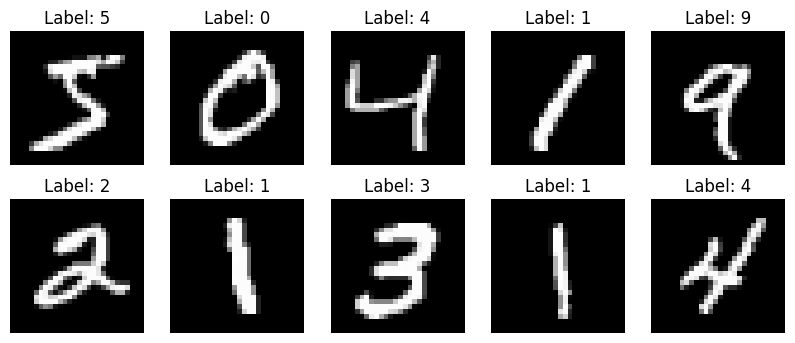

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Загрузка данных
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Нормализация (0–1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encoding меток
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Вывод нескольких примеров
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()


# Build a fully connected neural network

In [2]:
from tensorflow.keras import models, layers

model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

# Train the model

In [3]:
history = model.fit(
    x_train, y_train_cat,
    epochs=10,
    batch_size=32,
    validation_split=0.1
)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8775 - loss: 0.4254 - val_accuracy: 0.9660 - val_loss: 0.1137
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9668 - loss: 0.1100 - val_accuracy: 0.9750 - val_loss: 0.0929
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9770 - loss: 0.0740 - val_accuracy: 0.9757 - val_loss: 0.0842
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9821 - loss: 0.0553 - val_accuracy: 0.9797 - val_loss: 0.0742
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9873 - loss: 0.0404 - val_accuracy: 0.9808 - val_loss: 0.0764
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.9899 - loss: 0.0301 - val_accuracy: 0.9787 - val_loss: 0.0864
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9919 - loss: 0.0252 - val_accuracy: 0.9795 - val_loss: 0.0834
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9928 - loss: 0.02

# Assess accuracy and visualize errors

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9708 - loss: 0.1103
Test accuracy: 0.9759
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


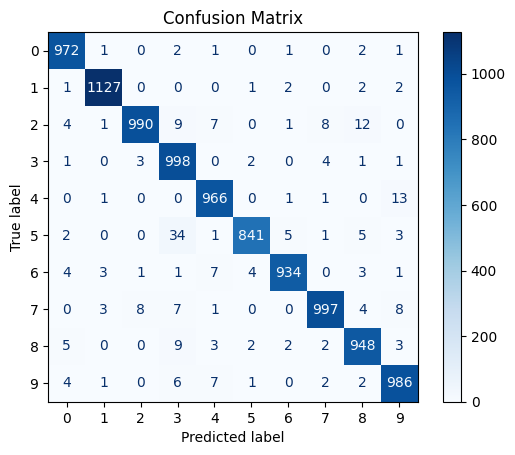

In [5]:
# Оценка на тесте
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"Test accuracy: {test_acc:.4f}")

# Предсказания
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Матрица ошибок
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


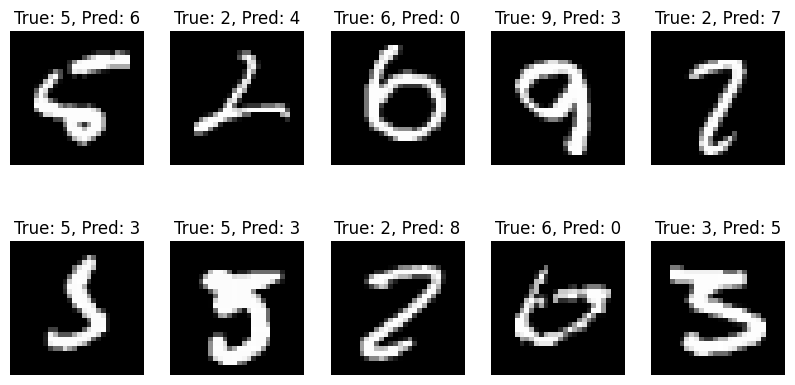

In [6]:
wrong_idx = np.where(y_pred != y_test)[0]

plt.figure(figsize=(10, 5))
for i, idx in enumerate(wrong_idx[:10]):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[idx], cmap='gray')
    plt.title(f"True: {y_test[idx]}, Pred: {y_pred[idx]}")
    plt.axis('off')
plt.show()
